In [1]:
#!pip install "tensorflow[and-cuda]" --upgrade --force-reinstall --no-cache-dir


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd

2025-04-03 21:25:20.993989: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 21:25:21.003273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743733521.014196   64655 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743733521.017532   64655 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743733521.026013   64655 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
df = pd.read_csv("data.csv")
df.head()

,x1,x2,y
0,14.728736,59.704260,0
1,27.951304,28.548151,0
2,-0.293835,47.542074,0
3,8.647573,51.429292,0
4,8.317275,41.214211,0


In [4]:
X = df[["x1","x2"]].values
y = df[["y"]].values

In [5]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((595, 2), (149, 2), (595, 1), (149, 1))

In [8]:
model = models.Sequential([
    layers.Input(shape=(2,)), 
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, validation_data=(X_test, y_test))

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9769 - loss: 0.0952 - val_accuracy: 0.9933 - val_loss: 0.0248
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9933 - val_loss: 0.0310
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.8635e-04 - val_accuracy: 1.0000 - val_loss: 5.1161e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.9776e-04 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.0029e-04 - val_acc

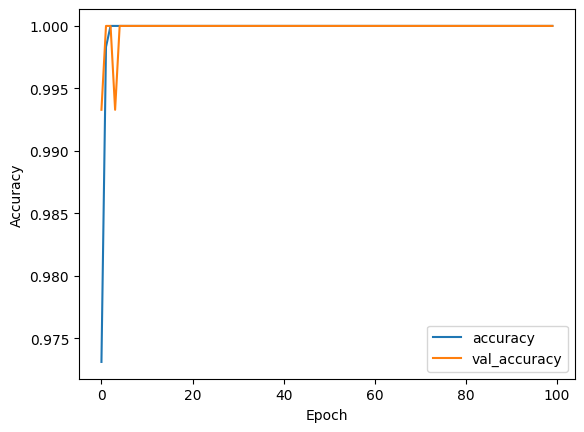

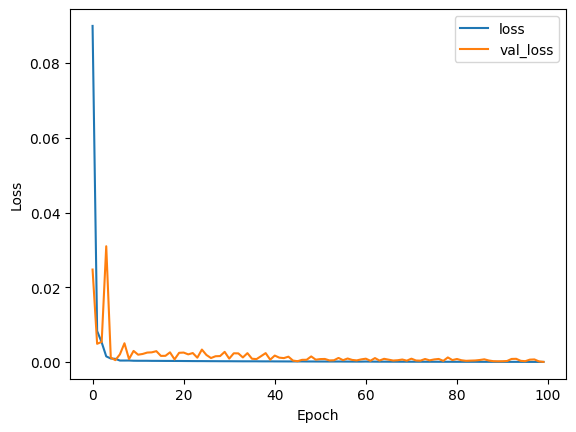

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
# Save the model
model.save("model.h5")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.4493e-05 


Test Loss: 4.308910865802318e-05
Test Accuracy: 1.0


<Axes: >

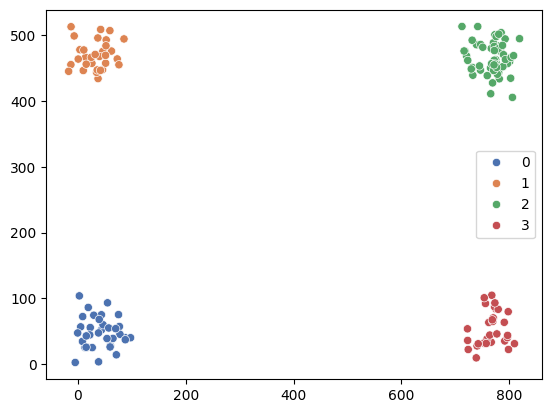

In [18]:
import seaborn as sb


sb.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test.flatten(), palette="deep")

In [22]:
import numpy as np

val = np.array([[700,400]])

print("Clase predicha es:", int(np.argmax(model.predict(val))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Clase predicha es: 2


In [24]:
!pip install pydot

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='./model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [27]:
# Exportar el modelo a formato TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo TFLite en un archivo
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

# Convertir el modelo TFLite a un archivo .h
with open("model.tflite", "rb") as f:
    tflite_data = f.read()

with open("model.h", "w") as f:
    f.write("#ifndef MODEL_H\n")
    f.write("#define MODEL_H\n\n")
    f.write(f"const unsigned char model_tflite[] = {{\n")
    f.write(", ".join(f"0x{byte:02x}" for byte in tflite_data))
    f.write("\n};\n\n")
    f.write(f"const unsigned int model_tflite_len = {len(tflite_data)};\n\n")
    f.write("#endif // MODEL_H\n")

INFO:tensorflow:Assets written to: /tmp/tmppoqxdxru/assets


INFO:tensorflow:Assets written to: /tmp/tmppoqxdxru/assets


Saved artifact at '/tmp/tmppoqxdxru'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  134074441304592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134074441307280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134074441303632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134074441308432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134074441308240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134074441309008: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1743734094.469657   64655 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1743734094.469670   64655 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-03 21:34:54.469966: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmppoqxdxru
2025-04-03 21:34:54.470344: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-03 21:34:54.470352: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmppoqxdxru
I0000 00:00:1743734094.473016   64655 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-03 21:34:54.473487: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-03 21:34:54.492816: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmppoqxdxru
2025-04-03 21:34:54.497760: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 